## Task-1 Problem statement

Our objective is to identify which features and algorithms are most helpful in predicting malignant or benign cancer and to classify whether the breast cancer is benign or malignant.

##Task 2: Data Collection

## Import Data Set


Data is downloaded from the UCI machine learning repository and uploaded to the git. Then load the data from the github repository.

In [1]:
# importing the libraries
import numpy as np 
# data processing, CSV file I/O
import pandas as pd 
# data visualization library
import seaborn as sns  
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd

In [2]:
#load wiscosin brest cancer dataset from my github repository

dataset = pd.read_csv('https://raw.githubusercontent.com/L00163529/Thesis/main/data_breast-cancer-wiscons.csv')

## Task 3: Cleaning the Data

Cleaning data involves processes like eliminating null entries,checking unique values, checking the index values, and eliminating unnecessary columns or rows.

## Check Our Data

Show the contents in the dataset and get the dimension.

In [3]:
#show the contents in the table
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
#show first row of the table

dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Get the dimensions of the data

In [5]:
#print data set dimension

print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (569, 33)


##Check missing or Null data points

In [6]:
## Get data types and missing values in Columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##Also check if the column is unique

In [7]:
# Get column names
column_names = dataset.columns 
for i in column_names:
  print('{} is unique: {}'.format(i, dataset[i].is_unique))

id is unique: True
diagnosis is unique: False
radius_mean is unique: False
texture_mean is unique: False
perimeter_mean is unique: False
area_mean is unique: False
smoothness_mean is unique: False
compactness_mean is unique: False
concavity_mean is unique: False
concave points_mean is unique: False
symmetry_mean is unique: False
fractal_dimension_mean is unique: False
radius_se is unique: False
texture_se is unique: False
perimeter_se is unique: False
area_se is unique: False
smoothness_se is unique: False
compactness_se is unique: False
concavity_se is unique: False
concave points_se is unique: False
symmetry_se is unique: False
fractal_dimension_se is unique: False
radius_worst is unique: False
texture_worst is unique: False
perimeter_worst is unique: False
area_worst is unique: False
smoothness_worst is unique: False
compactness_worst is unique: False
concavity_worst is unique: False
concave points_worst is unique: False
symmetry_worst is unique: False
fractal_dimension_worst is uni

##Check the index values

In [8]:
# find the index values for the dataset

dataset.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

##Drop unnecessary columns in a dataset

Analysis is made easy by handling only the necessary columns. The next step is to eliminate unnecessary columns from the table.

In [9]:
# Get column names
col = dataset.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [10]:
# y includes our labels and x includes our features
y = dataset.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = dataset.drop(list,axis = 1 )
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


##Identify rows that contain duplicate Data

In [11]:
# calculate duplicates
dups = x.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(x[dups])

False
Empty DataFrame
Columns: [radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 30 columns]


##Task 4: Data Analysis and Exploration

Number of Benign:  357
Number of Malignant :  212


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


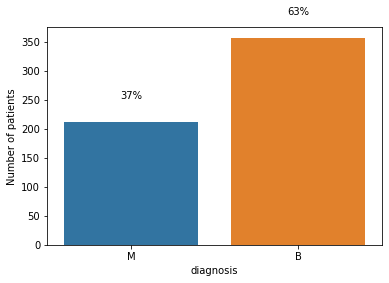

In [12]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
ax.set_ylabel('Number of patients')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

##Basic statistics

In [13]:
#discribe the features in the dataset

x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


###Exploring data using pairplot : To cehck both the distribution of single variable and relationship between two variables.

In [14]:
# first ten features
data_dia = y
data = x
# standardization of the data
data_n_2 = (data - data.mean()) / (data.std())

<Figure size 720x720 with 0 Axes>

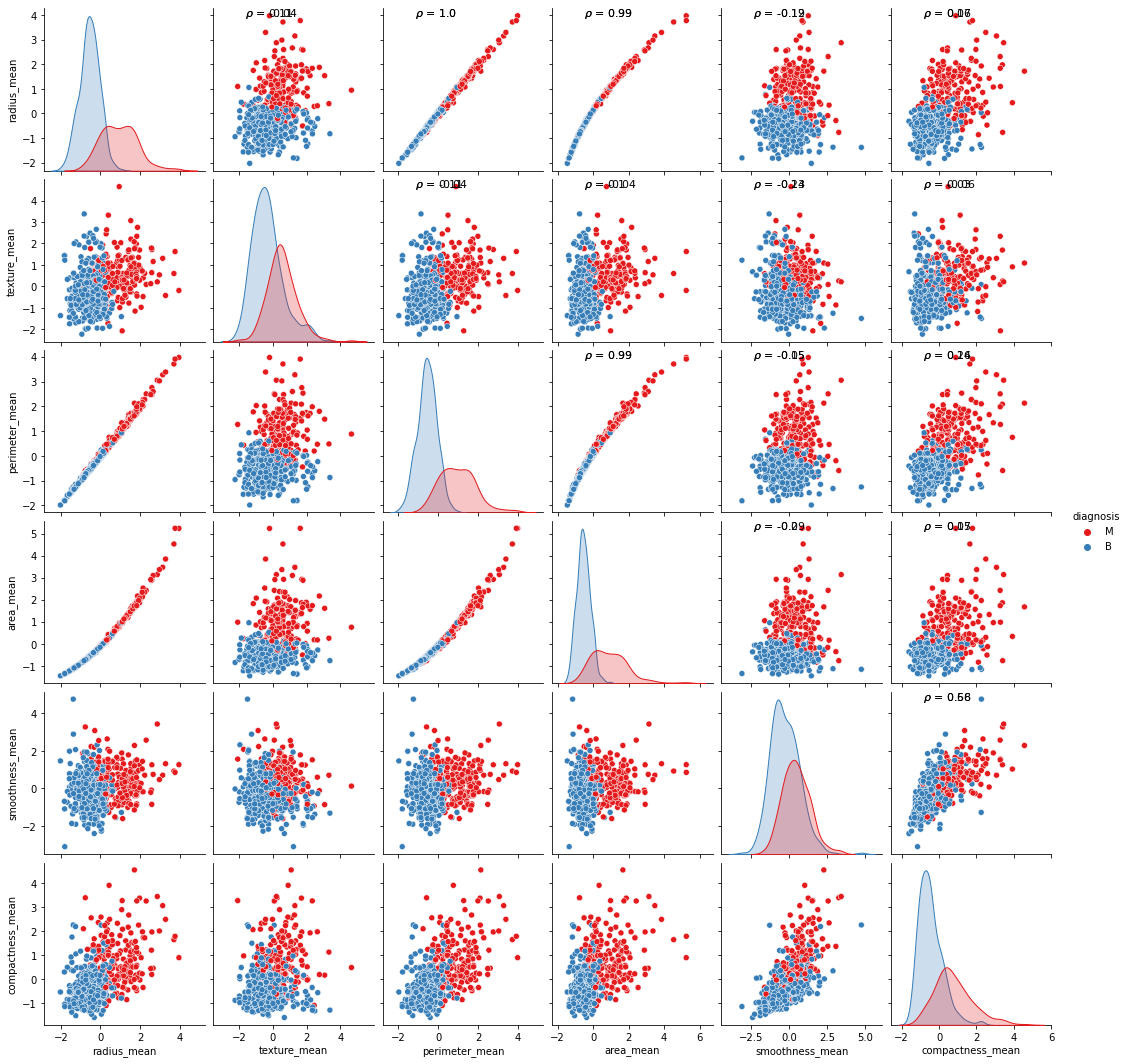

In [15]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 11, xycoords = ax.transAxes)
# First six features
data = pd.concat([y,data_n_2.iloc[:,0:6]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
# Map the plots to the locations

grid = grid.map_upper(corr)


<Figure size 720x720 with 0 Axes>

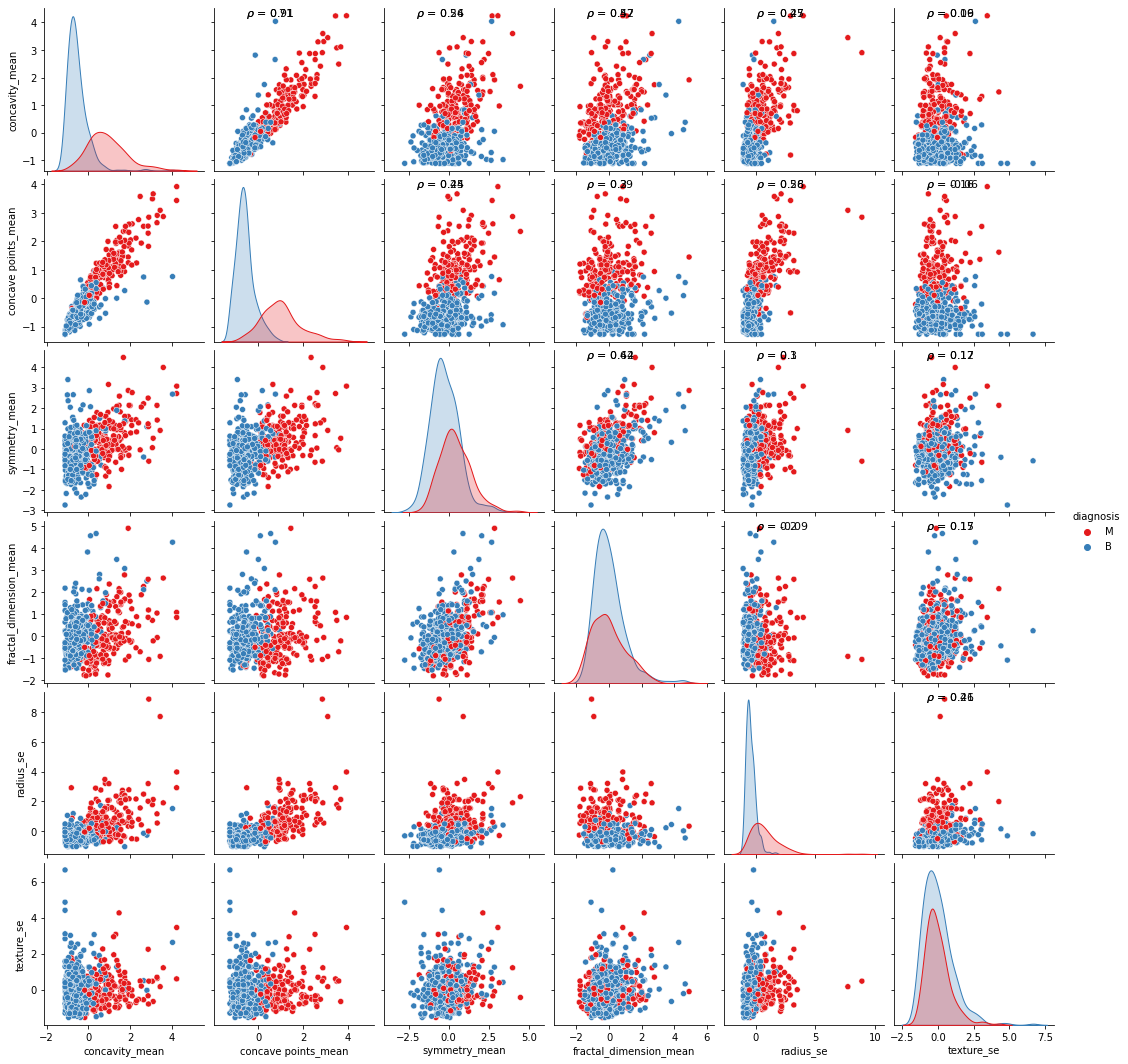

In [16]:
# Next six features
data = pd.concat([y,data_n_2.iloc[:,6:12]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
# Map the plots to the locations
grid = grid.map_upper(corr)


<Figure size 720x720 with 0 Axes>

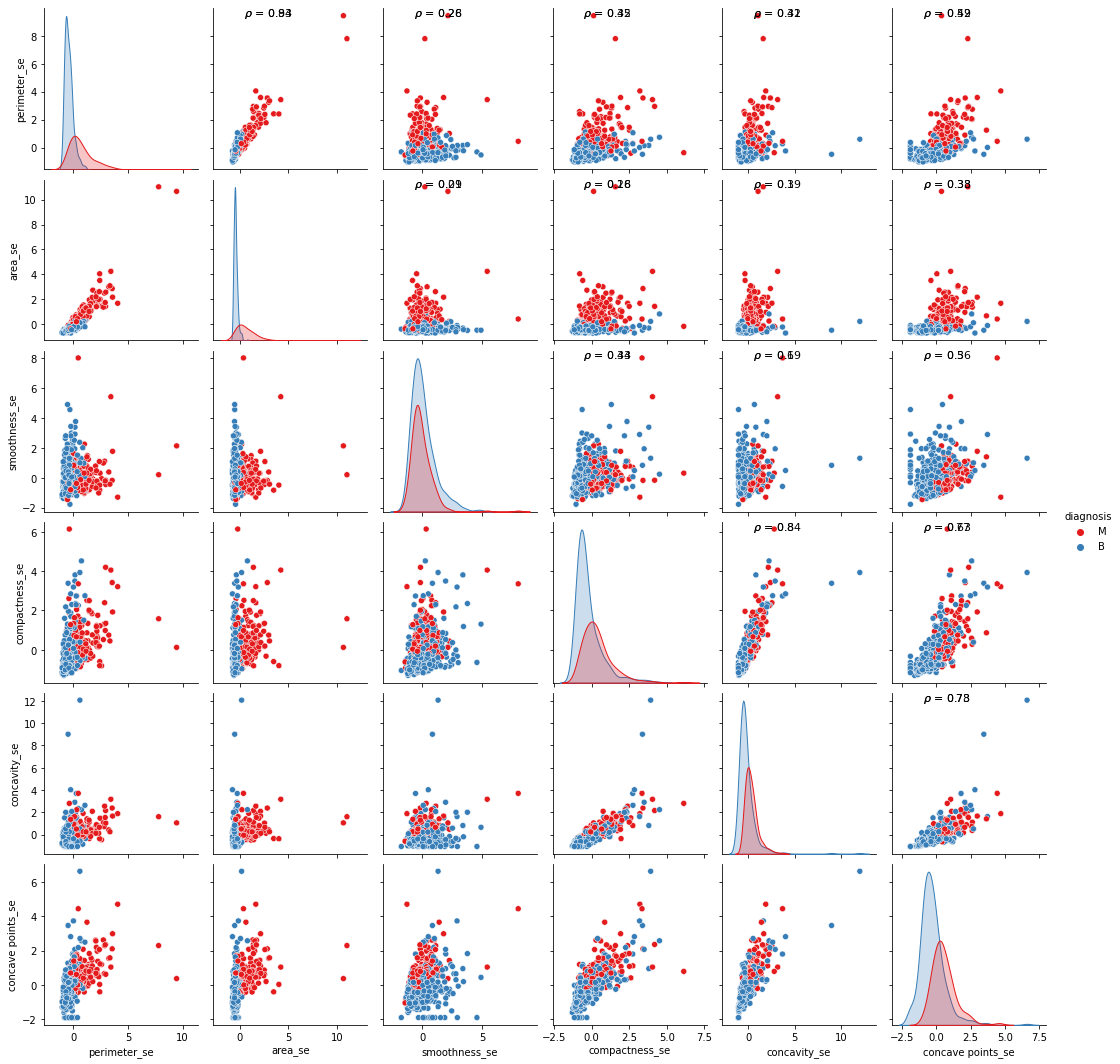

In [17]:
# Next six features
data = pd.concat([y,data_n_2.iloc[:,12:18]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
# Map the plots to the locations
grid = grid.map_upper(corr)


<Figure size 720x720 with 0 Axes>

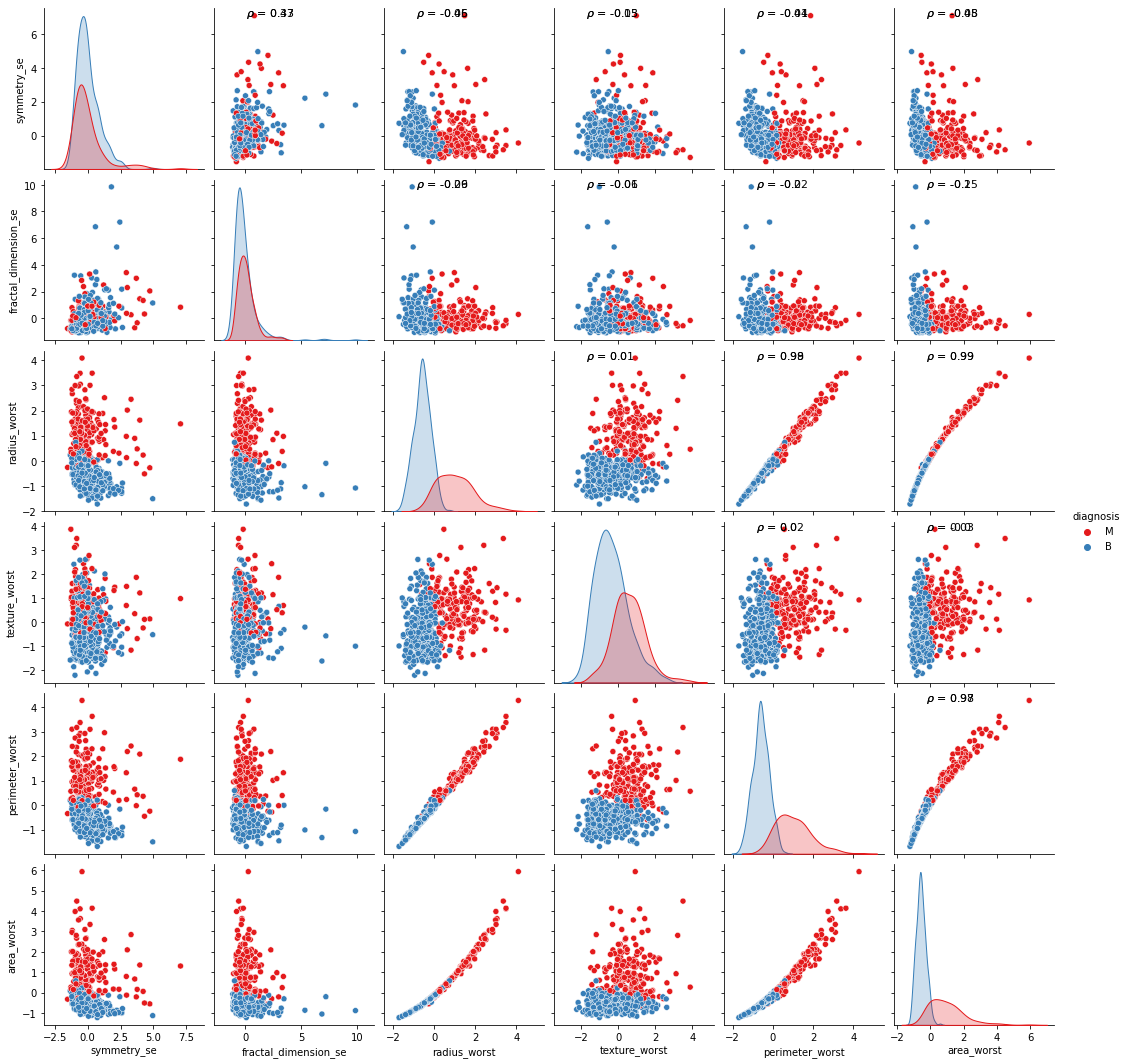

In [18]:
# Next six features
data = pd.concat([y,data_n_2.iloc[:,18:24]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
# Map the plots to the locations
grid = grid.map_upper(corr)

<Figure size 720x720 with 0 Axes>

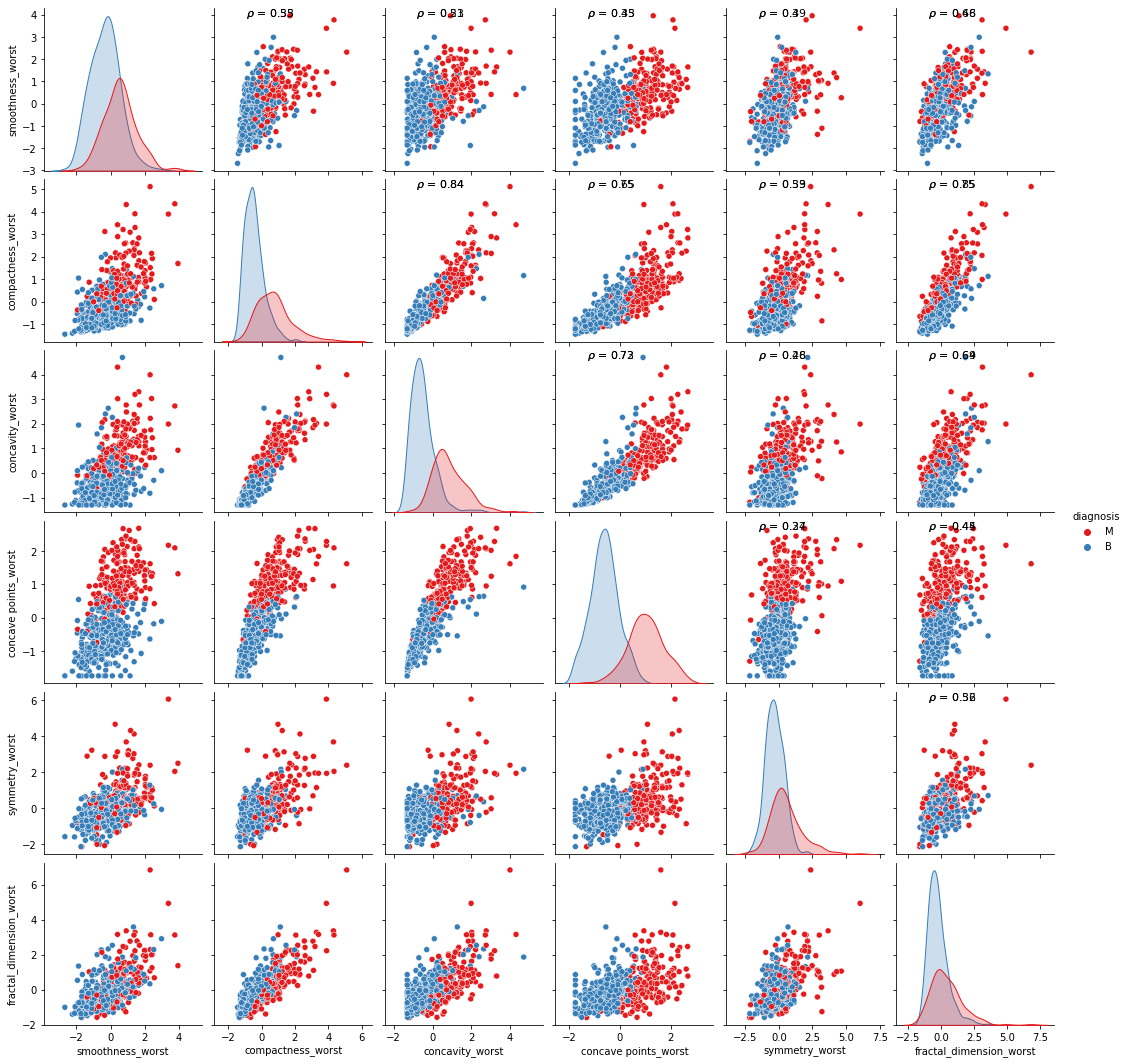

In [19]:
# Next six features
data = pd.concat([y,data_n_2.iloc[:,24:32]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
# Map the plots to the locations
grid = grid.map_upper(corr)


##Task 5: Feature Selection Technique in Predictive modeling using Python

##Univariate feature selection (Chi-square)

###Import libraries

In [20]:
# importing the libraries
# linear algebra
import numpy as np 
# data processing, CSV file I/O
import pandas as pd 
# data visualization library
import seaborn as sns  
import matplotlib.pyplot as plt
from pandas import DataFrame
import time


Import necessary libraries and packages to perform feature selection. Splitting data set in to train and test.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
#import chi2 package from sklearn

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 10 features
select_feature = SelectKBest(chi2, k=10).fit(x_train, y_train)

In [23]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
fs_chi2 = DataFrame(select_feature.scores_, columns = ["Chi_Square"], index=x_train.columns)

In [24]:
fs_chi2 = fs_chi2.reset_index()

In [25]:
#print feature selection values in ascending order
fs_chi2 = fs_chi2.sort_values('Chi_Square',ascending=0)
fs_chi2

,index,Chi_Square
23,area_worst,75021.73
3,area_mean,36689.96
13,area_se,6127.41
22,perimeter_worst,2405.13
2,perimeter_mean,1340.61
20,radius_worst,325.78
0,radius_mean,177.95
12,perimeter_se,172.70
21,texture_worst,116.96
1,texture_mean,60.69


# Principal Component Analysis (PCA)

It is a dimensionality reduction technique.

Text(0, 0.5, 'explained_variance_ratio_')

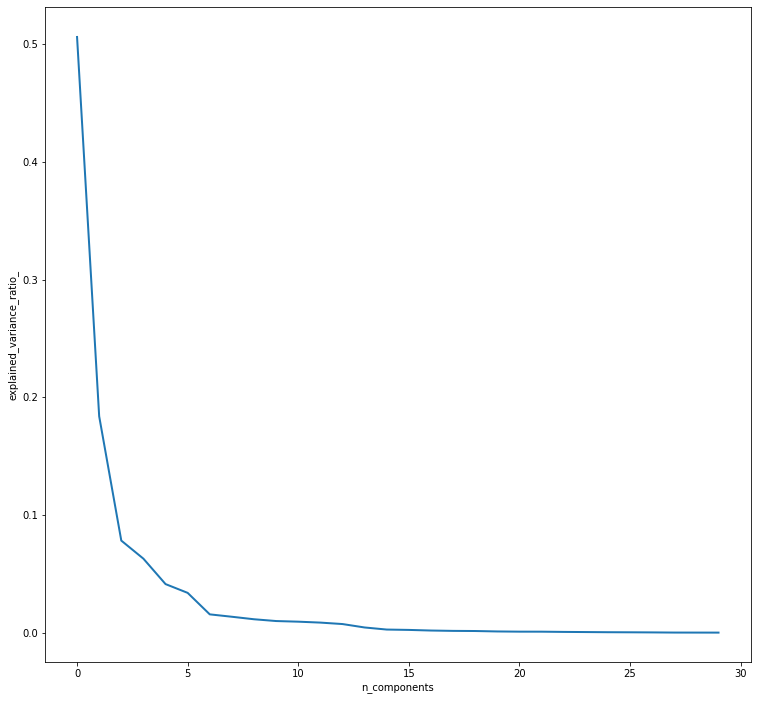

In [26]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

##Task 6: Data Modeling

The next step is to model the data and analyze it. ROC,confusion matrix, and precision recall curve are plotted to identify which algorithm has more accuracy.

##Setting the working environment

In [27]:
#import necessary libraries
import platform
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
from copy import copy
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer, RobustScaler
import sklearn
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Normalizer, FunctionTransformer
from sklearn.kernel_approximation import Nystroem
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, r2_score
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [28]:
#load the data as a predefined function

def LoadData():
    global feature_names, response_name, n_features, model_full  
    model_full = pd.read_csv('https://raw.githubusercontent.com/L00163529/Thesis/main/data_breast-cancer-wiscons.csv')
        
    # we change the class values (at the column number 2) from B to 0 and from M to 1
    model_full.iloc[:,1].replace('B', 0,inplace=True)
    model_full.iloc[:,1].replace('M', 1,inplace=True)
    response_name = ['diagnosis']
    drop_list = ['Unnamed: 32','id','diagnosis']
    model_full_x= model_full.drop(drop_list,axis = 1)
    X = model_full_x #label
    y = model_full.diagnosis #diagnosis
    #split the dataset as train and test
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size = 0.3,
                                                        random_state = 12345)
    return X_train, y_train, X_test, y_test

In [29]:
#load data to frames

x_train, y_train, x_test, y_test = LoadData()

After loading the data perform the feature selection to select best feature that gives more accuracy on prediction.

In [30]:
#Univariate feature selection SelectKBest, chi2
fs_chi2 = ['texture_mean', 'area_mean', 'concavity_mean', 'symmetry_mean', 'area_se', 
                     'concavity_se', 'smoothness_worst', 'concavity_worst', 'symmetry_worst', 
                     'fractal_dimension_worst']

In [31]:
# Chi2
X_train = x_train[fs_chi2]
X_test = x_test[fs_chi2]

# scaling data
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [32]:
#print train and test data dimension
print('Size of data:')
print ('The train data has {0} rows and {1} columns'.format(X_train.shape[0],X_train.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(X_test.shape[0],X_test.shape[1]))

Size of data:
The train data has 398 rows and 10 columns
----------------------------
The test data has 171 rows and 10 columns








## ROC curve

To analyze accuracy of different algorithms we are plotting ROC curve 

In [33]:
#defining variables and functions for plotting ROC curve of different algorithms
def Plot_ROC_Precision_Recall(label):
    class_names = [0, 1]
    fig, (left, right) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange', label=label)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve (area = %0.7f)' % auc)
    plt.legend(loc='best')

    plt.subplot(1, 2, 2)
    precision, recall, _ = precision_recall_curve(y_test, y_probabilities_success)

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

    plt.tight_layout()
    plt.show()
  

In [34]:
def Plot_Predictor_Importance(logisticRegression = True):
    if(logisticRegression):
        feature_importance = best_model.feature_importances_
        feature_importance = 100.0 * (feature_importance / feature_importance.max())
        sorted_idx = np.argsort(feature_importance)
        y_pos = np.arange(sorted_idx.shape[0]) + .5
        fig, ax = plt.subplots()
        fig.set_size_inches(8, 5)
        ax.barh(y_pos, feature_importance[sorted_idx], align='center', color='green', ecolor='black', height=0.5)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(feature_names)
        ax.invert_yaxis()
        ax.set_xlabel('Relative Importance')
        ax.set_title('Predictor Importance')
        plt.show()

In [35]:
def Print_Model_Metrics(algoName):
    global testPerformanceData
    true_negative  = cm[0, 0]
    true_positive  = cm[1, 1]
    false_negative = cm[1, 0]
    false_positive = cm[0, 1]
    total = true_negative + true_positive + false_negative + false_positive

    accuracy_ = (true_positive + true_negative)/total
    precision_ = (true_positive)/(true_positive + false_positive)
    recall_ = (true_positive)/(true_positive + false_negative)
    misclassification_rate = (false_positive + false_negative)/total
    F1_ = (2*true_positive)/(2*true_positive + false_positive + false_negative)
    assert accuracy == accuracy_, "accuracy score does not agree"
    assert precision == precision_, "precision score does not agree"
    assert recall == recall_, "recall score does not agree"
    assert round(F1,6) == round(F1_,6), "F1: " + str(F1) + " != F1_: " + str(F1_)

    header = ["Metric", "Testing Performance"]
    table = [["accuracy",               accuracy],
             ["precision",              precision],
             ["recall",                 recall],
             ["misclassification rate", misclassification_rate],
             ["F1",                     F1],
             ["r2",                     r2],
             ["AUC",                    auc],
             ["mse",                    mse],
             ["logloss",                logloss]
            ]

    print(tabulate(table, header, tablefmt="fancy_grid"))
    testPerformanceData = testPerformanceData.append({'Algorithm' : algoName,'Accuracy' : accuracy,'AUC' : auc,'Precision' : precision,'Recall' : recall,'F1' : F1},ignore_index = True)

In [36]:
#confusion matrix

def Plot_Confusion_Matrix(best_model):
    cmap = plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    title='Confusion matrix (on test data)'
    classes = [0, 1]
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    c_report = classification_report(y_test, y_predicted_test)
    print('\nClassification report:\n', c_report)

    ntotal = len(y_test)
    correct = y_test == y_predicted_test
    numCorrect = sum(correct)
    percent = round( (100.0*numCorrect)/ntotal, 6)
    print("\nCorrect classifications on test data: {0:d}/{1:d} {2:8.3f}%".format(numCorrect,
                                                                                 ntotal,
                                                                                 percent))
    prediction_score = 100.0*best_model.score(X_test, y_test)
    assert (round(percent,3) == round(prediction_score, 3)), "prediction score does not agree"

In [37]:
def dataPreProc(fs):
    X_train, y_train, X_test, y_test = LoadData(fs)
    seed = 7
    np.random.seed(seed)
    # scaling data
    scale = StandardScaler()
    X_tr = scale.fit_transform(X_train)
    X_te = scale.fit_transform(X_test)
    return X_tr, X_te

In [38]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [39]:
#best model validation

def best_mdl():
    print('\n Best estimator:')
    print(model.best_estimator_)
    print('\n Best score:')
    print(model.best_score_ * 2 - 1)
    print('\n Best parameters:')
    print(model.best_params_)
    results = pd.DataFrame(model.cv_results_)
    print('\n CV results:')
    print(results.head())
    #best_model = results.best_estimator_
    best_model = model_result.best_estimator_
    return best_model

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
#X_train, y_train, X_test, y_test = LoadData()
model_full.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,1,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,1,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,1,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,NaN


In [42]:
model_full.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,0.00
mean,30371831.43,0.37,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,NaN
std,125020585.61,0.48,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,NaN
min,8670.00,0.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,NaN
25%,869218.00,0.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,NaN
50%,906024.00,0.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,NaN
75%,8813129.00,1.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,NaN
max,911320502.00,1.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,NaN


In [43]:
model_full.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Distribution of Cancer patients on whole data


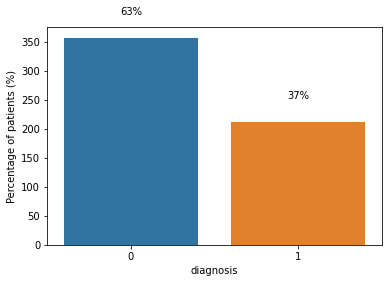

In [44]:
# lets get the % of Cancer Patients
print('Distribution of Cancer patients on whole data')
ax = sns.countplot(model_full['diagnosis'])
ax.set_ylabel('Percentage of patients (%)')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

Distribution of the data:
----------------------------------------------------
The total data has 569 rows and 33 columns

Malignent cases = 212  and % = 37.26 

Benign cases = 357  and % = 62.74 

----------------------------------------------------
Distribution of training data
----------------------------------------------------
The train data has 398 rows and 10 columns

The training data % = 69.95 

Malignent cases = 152  and % = 38.19 

Benign cases = 246  and % = 61.81 

----------------------------------------------------
Distribution of testing data
----------------------------------------------------
The test data has 171 rows and 10 columns

The testing data % = 30.05 

Malignent cases = 60  and % = 35.09 

Benign cases = 111  and % = 64.91 

Training data : Distribution of patients


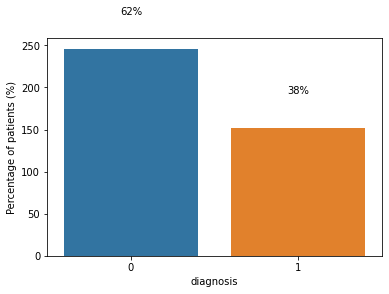

In [45]:
no, yes = model_full['diagnosis'].value_counts()
#X_train, y_train, X_test, y_test = LoadData()
print('Distribution of the data:')
print ('----------------------------------------------------')
print ('The total data has {0} rows and {1} columns'.format(model_full.shape[0],model_full.shape[1]))
print ('')
print ('Malignent cases = {0}  and % = {1} '.format(yes,np.round((yes/model_full.shape[0])*100,2)))
print ('')
print ('Benign cases = {0}  and % = {1} '.format(no,np.round((no/model_full.shape[0])*100,2)))
print ('')
print ('----------------------------------------------------')
print ('Distribution of training data')
print ('----------------------------------------------------')
print ('The train data has {0} rows and {1} columns'.format(X_train.shape[0],X_train.shape[1]))
print ('')
print ('The training data % = {0} '.format(np.round((X_train.shape[0]/model_full.shape[0])*100,2)))
print ('')
y_tr = y_train.sum()
n_tr = X_train.shape[0] -y_tr    #yes1
print ('Malignent cases = {0}  and % = {1} '.format(y_tr,np.round((y_tr/X_train.shape[0])*100,2)))
print ('')
print ('Benign cases = {0}  and % = {1} '.format(n_tr,np.round((n_tr/X_train.shape[0])*100,2)))
print ('')
print ('----------------------------------------------------')
print ('Distribution of testing data')
print ('----------------------------------------------------')
print ('The test data has {0} rows and {1} columns'.format(X_test.shape[0],X_test.shape[1]))
print ('')
print ('The testing data % = {0} '.format(np.round((X_test.shape[0]/model_full.shape[0])*100,2)))
print ('')
y_te = y_test.sum()
n_te = X_test.shape[0] -y_te
print ('Malignent cases = {0}  and % = {1} '.format(y_te,np.round((y_te/X_test.shape[0])*100,2)))
print ('')
print ('Benign cases = {0}  and % = {1} '.format(n_te,np.round((n_te/X_test.shape[0])*100,2)))
print ('')
# lets get the % of Blood Transfusion patients
print('Training data : Distribution of patients')
ax = sns.countplot(y_train)
ax.set_ylabel('Percentage of patients (%)')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

Testing data : Distribution of patients


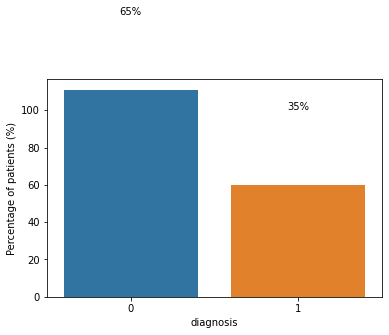

In [46]:
# lets get the % of Blood Transfusion patients
print('Testing data : Distribution of patients')
ax = sns.countplot(y_test)
ax.set_ylabel('Percentage of patients (%)')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

In [47]:
#performing different algorithms on dataset

nonlr_clf_dict = dict()

# 1
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
nonlr_clf_dict['Logistic Regression'] = clf

# 2
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
nonlr_clf_dict['Random Forest Classifier'] = clf

# 3
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
nonlr_clf_dict['Gradient Boosting Classifier'] = clf

# 4
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
nonlr_clf_dict['Extra Trees Classifier'] = clf

# 5
from xgboost import XGBClassifier
clf = XGBClassifier()
nonlr_clf_dict['XGB Classifier'] = clf

# 6
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
nonlr_clf_dict['KNeighbors Classifier'] = clf

# 7
from sklearn.svm import SVC
clf = SVC(kernel='rbf',probability=True)   
nonlr_clf_dict['SVM Classifier'] = clf

# 8
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
clf = tree.DecisionTreeClassifier()
clf_out = clf.fit(X_train, y_train)
nonlr_clf_dict['Adaboost Classifier'] = clf

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


---------------------------------------------------------------------
Logistic Regression
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.9774367088607594 0.016593145535715302

---------------------------------------------------------------------
Logistic Regression
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.9864367816091955 0.01661545839043001

---------------------------------------------------------------------
Logistic Regression
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.9541935483870969 0.03307635944899851

---------------------------------------------------------------------
Logistic Regression
-------------------------------------

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


---------------------------------------------------------------------
Logistic Regression
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f average_precision 0.9933734527812419 0.007764930193291541

---------------------------------------------------------------------
Logistic Regression
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f roc_auc 0.993118718455124 0.009847608242232039

Average precision-recall score: 0.99
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ accuracy               │             0.953216  │
├────────────────────────┼───────────────────────┤
│ precision              │             0.933333  │
├────────────────────────┼───────────────────────┤
│ recall       

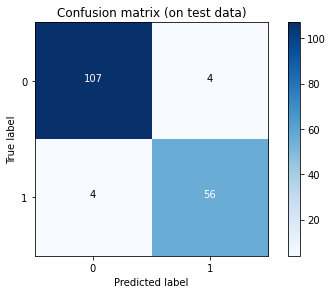

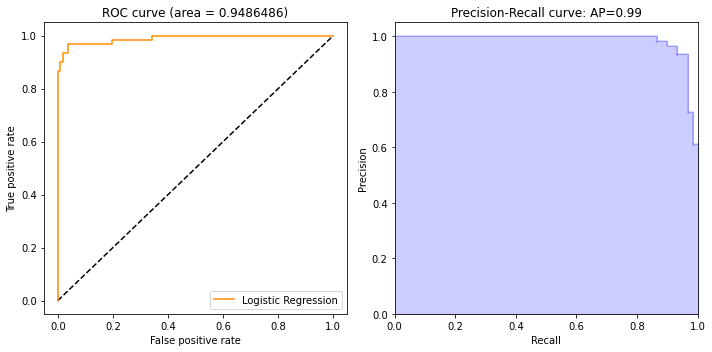

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Random Forest Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.9473101265822784 0.033828359040019844



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Random Forest Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.93192118226601 0.060979093574662205



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Random Forest Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.9341935483870968 0.0010535439753905807



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Random Forest Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f f1 0.9395608301325036 0.04089516672800847



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Random Forest Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f average_precision 0.9886954871916561 0.010196345215389934



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.7s finished


---------------------------------------------------------------------
Random Forest Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f roc_auc 0.990953522053983 0.008085105628855132

Average precision-recall score: 0.97
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ accuracy               │             0.947368  │
├────────────────────────┼───────────────────────┤
│ precision              │             0.947368  │
├────────────────────────┼───────────────────────┤
│ recall                 │             0.9       │
├────────────────────────┼───────────────────────┤
│ misclassification rate │             0.0526316 │
├────────────────────────┼───────────────────────┤
│ F1                     │             0.923077  │
├────────────────────────┼───────────────────────┤
│ r2 

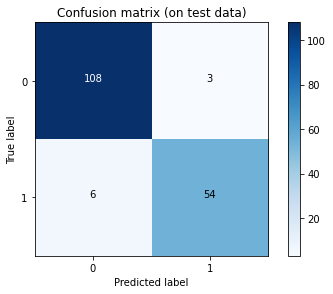

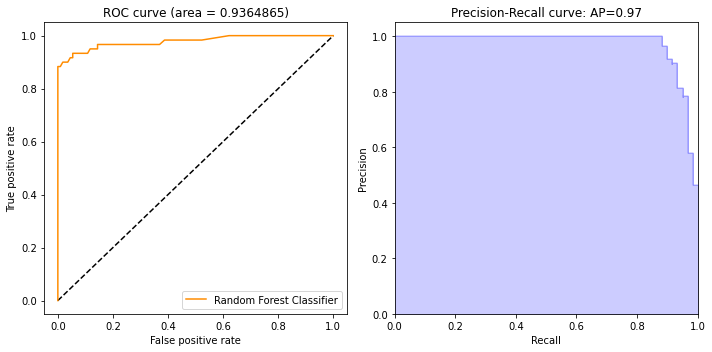

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Gradient Boosting Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.9598417721518988 0.027854106084473494



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Gradient Boosting Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.9440905394415833 0.049950740763084076



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Gradient Boosting Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.9539784946236558 0.033835277321814544



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Gradient Boosting Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f f1 0.9482749923903118 0.034446155706278556



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Gradient Boosting Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f average_precision 0.989362854043646 0.013129757698737895



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.6s finished


---------------------------------------------------------------------
Gradient Boosting Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f roc_auc 0.9931076585472898 0.008643831548952461

Average precision-recall score: 0.97
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ accuracy               │             0.935673  │
├────────────────────────┼───────────────────────┤
│ precision              │             0.888889  │
├────────────────────────┼───────────────────────┤
│ recall                 │             0.933333  │
├────────────────────────┼───────────────────────┤
│ misclassification rate │             0.0643275 │
├────────────────────────┼───────────────────────┤
│ F1                     │             0.910569  │
├────────────────────────┼───────────────────────┤


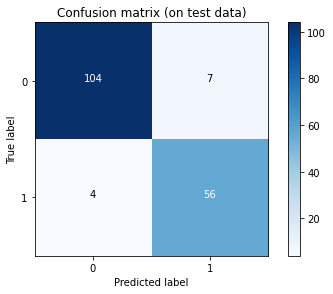

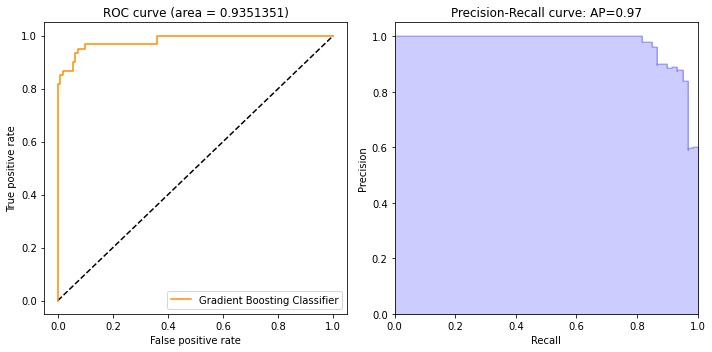

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Extra Trees Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.9498417721518987 0.035277501087797036



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Extra Trees Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.9313725490196079 0.059318181650789156



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Extra Trees Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.9275268817204301 0.024629055143605014



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Extra Trees Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f f1 0.9394562632507238 0.0405070401683359



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Extra Trees Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f average_precision 0.9882656803873223 0.009969537886895172



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.3s finished


---------------------------------------------------------------------
Extra Trees Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f roc_auc 0.9901335088874259 0.00794379255707977

Average precision-recall score: 0.98
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ accuracy               │             0.94152   │
├────────────────────────┼───────────────────────┤
│ precision              │             0.916667  │
├────────────────────────┼───────────────────────┤
│ recall                 │             0.916667  │
├────────────────────────┼───────────────────────┤
│ misclassification rate │             0.0584795 │
├────────────────────────┼───────────────────────┤
│ F1                     │             0.916667  │
├────────────────────────┼───────────────────────┤
│ r2   

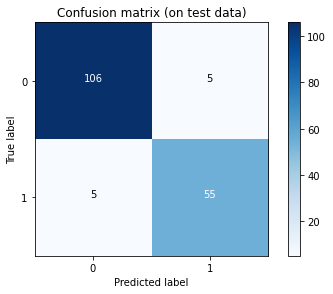

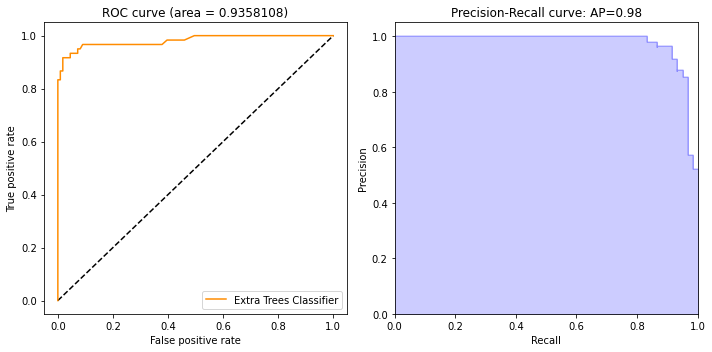

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
XGB Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.9498101265822785 0.030567949478675804

---------------------------------------------------------------------
XGB Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.9444973544973545 0.05957079861938184



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
XGB Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.9273118279569893 0.03917639785827929

---------------------------------------------------------------------
XGB Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f f1 0.9344752574689202 0.03756512434463002



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished


---------------------------------------------------------------------
XGB Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f average_precision 0.9873806303616941 0.01223438502677847

---------------------------------------------------------------------
XGB Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f roc_auc 0.9912344963791968 0.008904306353081481

Average precision-recall score: 0.98
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ accuracy               │             0.953216  │
├────────────────────────┼───────────────────────┤
│ precision              │             0.919355  │
├────────────────────────┼───────────────────────┤
│ recall                 

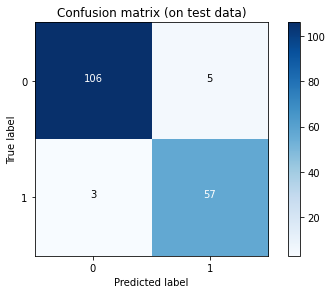

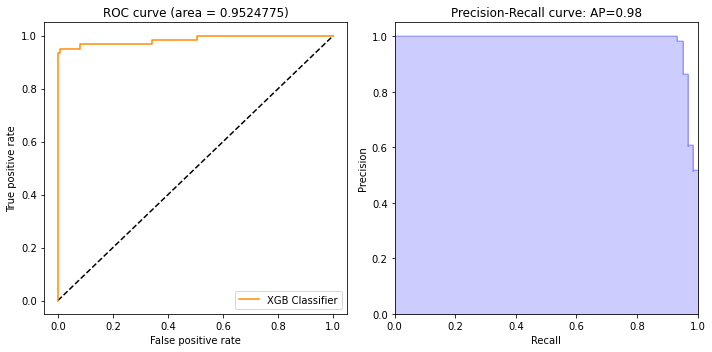


---------------------------------------------------------------------
KNeighbors Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.9398101265822785 0.045613617122263465

---------------------------------------------------------------------
KNeighbors Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.9225537634408603 0.06322089166034116

---------------------------------------------------------------------
KNeighbors Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.9215053763440861 0.05948870675963909

---------------------------------------------------------------------
KNeighbors Classifier
----------------------------

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


---------------------------------------------------------------------
KNeighbors Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f average_precision 0.9652431080590521 0.024039205797175184

---------------------------------------------------------------------
KNeighbors Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f roc_auc 0.973908536317753 0.018315337614802984

Average precision-recall score: 0.96
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ accuracy               │             0.947368  │
├────────────────────────┼───────────────────────┤
│ precision              │             0.981132  │
├────────────────────────┼───────────────────────┤
│ recall   

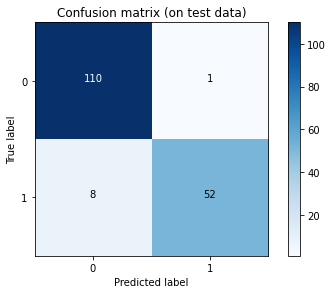

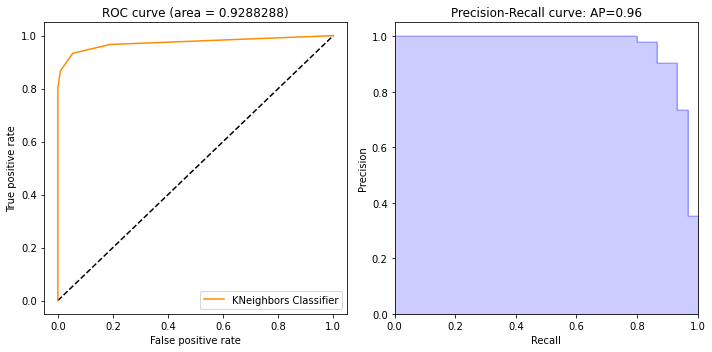


---------------------------------------------------------------------
SVM Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.9649050632911391 0.02144355729946651

---------------------------------------------------------------------
SVM Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.9546236559139786 0.03281525945843008



[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
SVM Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.9541935483870969 0.025487273490016712

---------------------------------------------------------------------
SVM Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f f1 0.954300985638185 0.027498789891062993

---------------------------------------------------------------------
SVM Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f average_precision 0.9888387138333788 0.01093402195214204



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


---------------------------------------------------------------------
SVM Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f roc_auc 0.9913843317972351 0.009256349390616841

Average precision-recall score: 0.98
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ accuracy               │             0.959064  │
├────────────────────────┼───────────────────────┤
│ precision              │             0.934426  │
├────────────────────────┼───────────────────────┤
│ recall                 │             0.95      │
├────────────────────────┼───────────────────────┤
│ misclassification rate │             0.0409357 │
├────────────────────────┼───────────────────────┤
│ F1                     │             0.942149  │
├────────────────────────┼───────────────────────┤
│ r2          

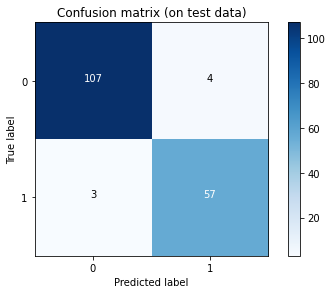

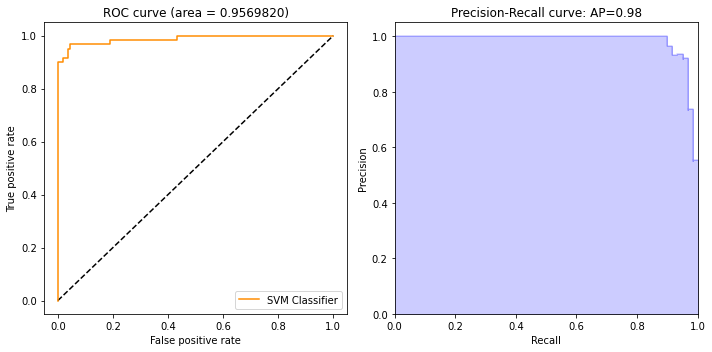


---------------------------------------------------------------------
Adaboost Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.929746835443038 0.031089577820592084

---------------------------------------------------------------------
Adaboost Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.9033975659229208 0.06770830877222689

---------------------------------------------------------------------
Adaboost Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.9473118279569892 0.016264662710700258

---------------------------------------------------------------------
Adaboost Classifier
------------------------------------

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


---------------------------------------------------------------------
Adaboost Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f roc_auc 0.9400627605881062 0.025882064426164933

Average precision-recall score: 0.78
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ accuracy               │              0.894737 │
├────────────────────────┼───────────────────────┤
│ precision              │              0.862069 │
├────────────────────────┼───────────────────────┤
│ recall                 │              0.833333 │
├────────────────────────┼───────────────────────┤
│ misclassification rate │              0.105263 │
├────────────────────────┼───────────────────────┤
│ F1                     │              0.847458 │
├────────────────────────┼───────────────────────┤
│ r2     

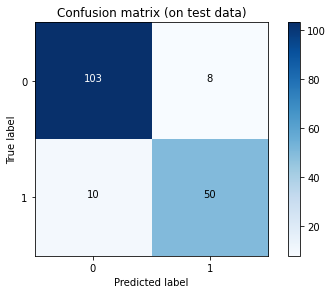

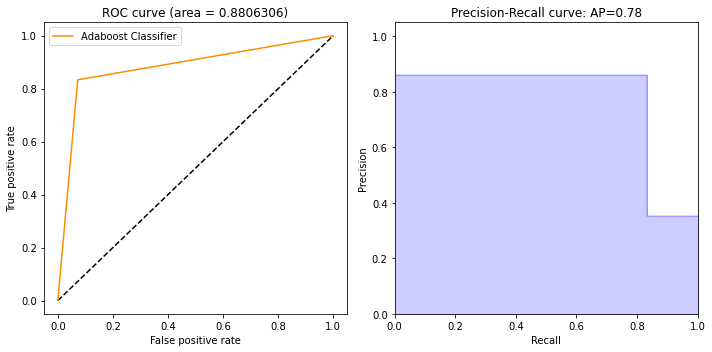

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
import numpy as np

folds = 5
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 10345)
scoring_strings = ['accuracy', 'precision', 'recall', 'f1',
                       'average_precision', 'roc_auc']
trainPerformanceData = pd.DataFrame(columns = ['Algorithm','Scoring Name','CV mean', 'CV std']) 
testPerformanceData = pd.DataFrame(columns = ['Algorithm','Accuracy','AUC','Precision','Recall','F1'])
# timing starts from this point for "start_time" variable
#start_time = timer(None)
for clf_name, clf in nonlr_clf_dict.items():
    for scoring in scoring_strings:
        scores = cross_val_score(clf, X_train, y_train, scoring=scoring, cv=skf,verbose=1, n_jobs=2)
        print("---------------------------------------------------------------------") 
        print(clf_name)
        print("---------------------------------------------------------------------") 
        print("Cross Validation scores on training data")
        print ('Scoring Name: CV mean: %.5f CV std: %.5f',scoring,np.mean(np.abs(scores)),np.std(scores))
        print("") 
        # append rows to an empty DataFrame 
        trainPerformanceData = trainPerformanceData.append({'Algorithm' : clf_name, 'Scoring Name' : scoring, 'CV mean' : np.mean(np.abs(scores)),'CV std' : np.std(scores)},  
                ignore_index = True) 
        
    clf.fit(X_train, y_train)
    y_predicted_test  = clf.predict(X_test)
    y_probabilities_test = clf.predict_proba(X_test)
    y_probabilities_success = y_probabilities_test[:, 1]

    from sklearn.metrics import average_precision_score
    average_precision = average_precision_score(y_test, y_probabilities_success)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))

    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities_success)

    mse        = mean_squared_error(y_test, y_predicted_test)
    logloss    = log_loss(y_test, y_predicted_test)
    accuracy   = accuracy_score(y_test, y_predicted_test)
    precision  = precision_score(y_test, y_predicted_test, average='binary')
    recall     = recall_score(y_test, y_predicted_test, average='binary')
    F1         = f1_score(y_test, y_predicted_test)
    r2         = r2_score(y_test, y_predicted_test)
    auc        = roc_auc_score(y_test, y_predicted_test)
    cm         = confusion_matrix(y_test, y_predicted_test)
    #testPerformanceData = testPerformanceData.append({'Algorithm' : clf_name,'Accuracy' : accuracy,'Average_Precision':average_precision,'F1' : F1 ,'Precision' : precision,'Recall' : recall,'AUC' : auc},ignore_index = True)
    Print_Model_Metrics(clf_name)
    Plot_Confusion_Matrix(clf)
    Plot_ROC_Precision_Recall(clf_name)
    #auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    print("")  
    #print("AUC scores on testing data")       
    #print(clf_name, 'auc score:', auc)
#timer(start_time)

In [49]:
#get the performance characteristics of different algorithms in a single table

trainPerformanceData

,Algorithm,Scoring Name,CV mean,CV std
0,Logistic Regression,accuracy,0.98,0.02
1,Logistic Regression,precision,0.99,0.02
2,Logistic Regression,recall,0.95,0.03
3,Logistic Regression,f1,0.97,0.02
4,Logistic Regression,average_precision,0.99,0.01
5,Logistic Regression,roc_auc,0.99,0.01
6,Random Forest Classifier,accuracy,0.95,0.03
7,Random Forest Classifier,precision,0.93,0.06
8,Random Forest Classifier,recall,0.93,0.00
9,Random Forest Classifier,f1,0.94,0.04


In [50]:
trainPerformanceData_pvt=pd.pivot_table(trainPerformanceData,index=["Algorithm"],values=["CV mean"],columns=["Scoring Name"],aggfunc=[np.min])
trainPerformanceData_pvt

amin                                          \
                              CV mean                                           
Scoring Name                 accuracy average_precision   f1 precision recall   
Algorithm                                                                       
Adaboost Classifier              0.93              0.89 0.93      0.90   0.95   
Extra Trees Classifier           0.95              0.99 0.94      0.93   0.93   
Gradient Boosting Classifier     0.96              0.99 0.95      0.94   0.95   
KNeighbors Classifier            0.94              0.97 0.92      0.92   0.92   
Logistic Regression              0.98              0.99 0.97      0.99   0.95   
Random Forest Classifier         0.95              0.99 0.94      0.93   0.93   
SVM Classifier                   0.96              0.99 0.95      0.95   0.95   
XGB Classifier                   0.95              0.99 0.93      0.94   0.93   

                                      
                                      
Scoring Name                 roc_auc  
Algorithm                             
Adaboost Classifier             0.94  
Extra Trees Classifier          0.99  
Gradient Boosting Classifier    0.99  
KNeighbors Classifier           0.97  
Logistic Regression             0.99  
Random Forest Classifier        0.99  
SVM Classifier                  0.99  
XGB Classifier                  0.99

In [51]:
testPerformanceData.sort_values(by=['Algorithm'])

,Algorithm,Accuracy,AUC,Precision,Recall,F1
7,Adaboost Classifier,0.89,0.88,0.86,0.83,0.85
3,Extra Trees Classifier,0.94,0.94,0.92,0.92,0.92
2,Gradient Boosting Classifier,0.94,0.94,0.89,0.93,0.91
5,KNeighbors Classifier,0.95,0.93,0.98,0.87,0.92
0,Logistic Regression,0.95,0.95,0.93,0.93,0.93
1,Random Forest Classifier,0.95,0.94,0.95,0.90,0.92
6,SVM Classifier,0.96,0.96,0.93,0.95,0.94
4,XGB Classifier,0.95,0.95,0.92,0.95,0.93


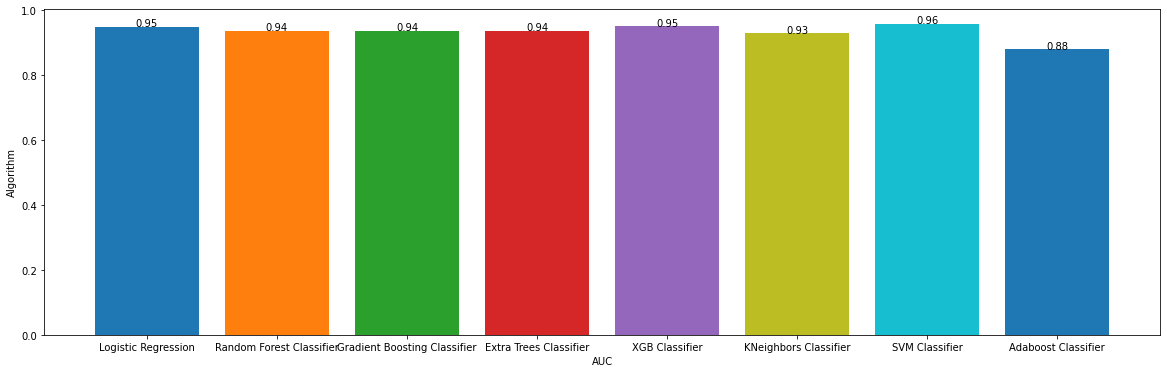

In [52]:
import matplotlib.pyplot as plt

def add_value_label(x_list, y_list):
  for i in range(0, len(x_list)):
    plt.text(i, float("{:.2f}".format(y_list[i])), float("{:.2f}".format(y_list[i])), ha='center')
# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 6)) 
color =['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:olive', 'tab:cyan'] 
ax.bar(testPerformanceData["Algorithm"], testPerformanceData['AUC'], color = color) 

plt.style.use('ggplot') 

add_value_label(testPerformanceData["Algorithm"], testPerformanceData['AUC'])
plt.ylabel('Algorithm')
plt.xlabel('AUC')
plt.show() 